<a href="https://colab.research.google.com/github/nepslor/teaching/blob/main/TimeSeriesForecasting/WhatCanBeForecasted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
install.packages("pracma")
install.packages("fpp3")
install.packages("gridExtra")
install.packages("tsfeatures")
install.packages("fma")

library("pracma")
library("fpp3")
library(gridExtra)
library("tsfeatures")
library("fma")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ────────────────────────────────────────────── fpp3 0.5 ──

✔ tibble      3.1.8     ✔ tsibble     1.1.3
✔ dplyr       1.1.0     ✔ tsibbledata 0.4.1
✔ tidyr       1.3.0     ✔ feasts      0.3.0
✔ lubridate   1.9.2     ✔ fable       0.3.2
✔ ggplot2     3.4.1     ✔ fabletools  0.3.2

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::fir

In [52]:
# utility function to set the plot dimensions 
set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }

set_plot_dimensions(15, 6)

# Autocorrelation function


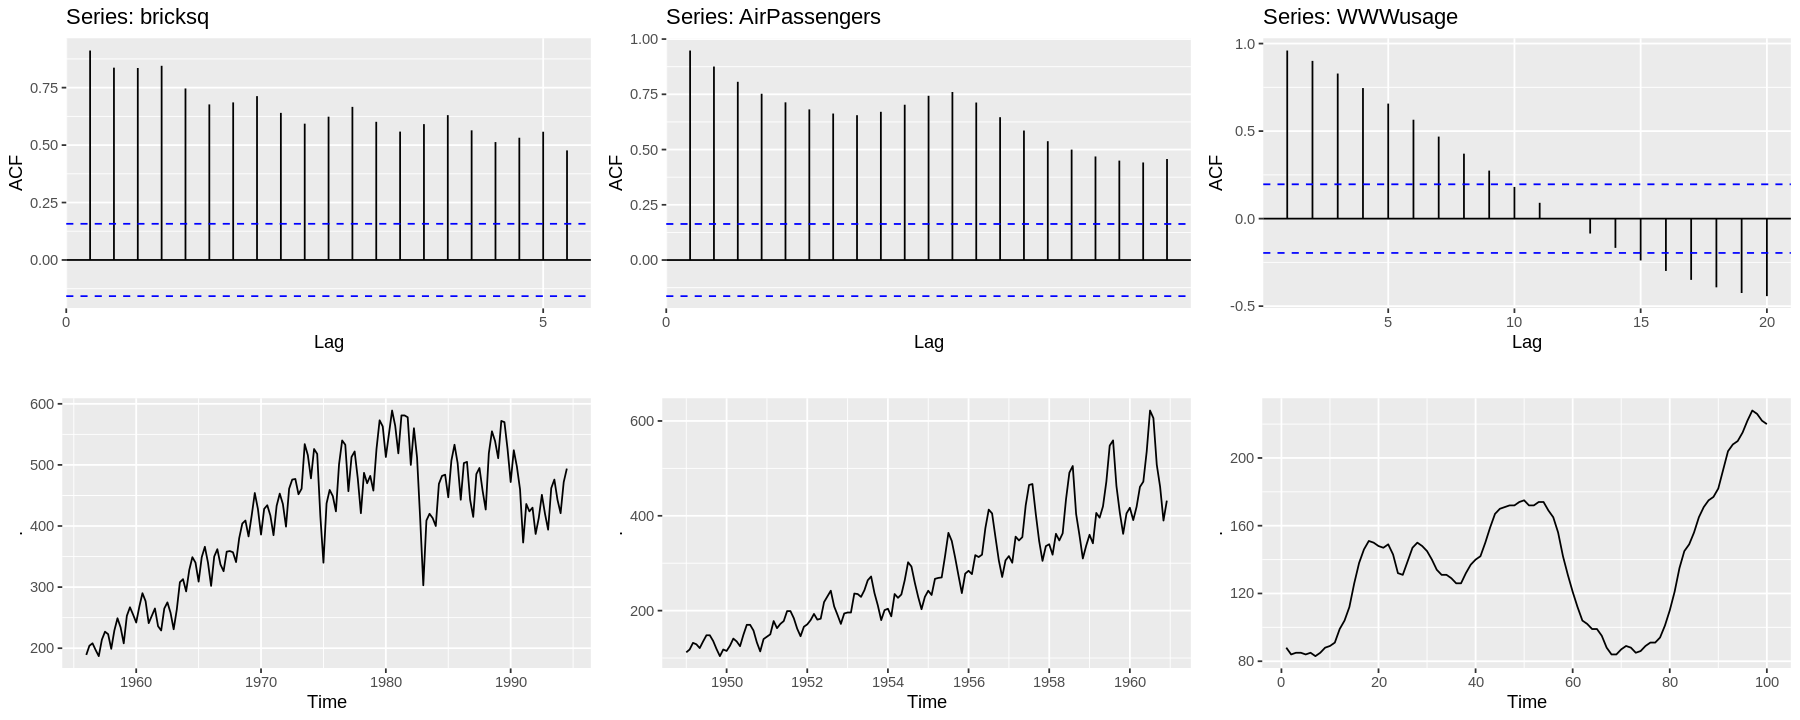

In [107]:
plt1 <- acf(bricksq, plot=FALSE) %>% autoplot()
plt2 <- acf(AirPassengers, lag_max = 100, plot=FALSE) %>% autoplot()
plt3 <- acf(WWWusage, lag_max = 100, plot=FALSE) %>% autoplot()

plt4 <- bricksq %>% autoplot()
plt5 <- AirPassengers %>% autoplot()
plt6 <- WWWusage %>% autoplot()

grid.arrange(plt1, plt2, plt3, plt4, plt5, plt6, ncol=3, nrow=2)

[1] "GOOG"

entropy: 0.994293
approx entropy: 1.351187

Plot variable not specified, automatically selected `.vars = value`
Plot variable not specified, automatically selected `.vars = value`


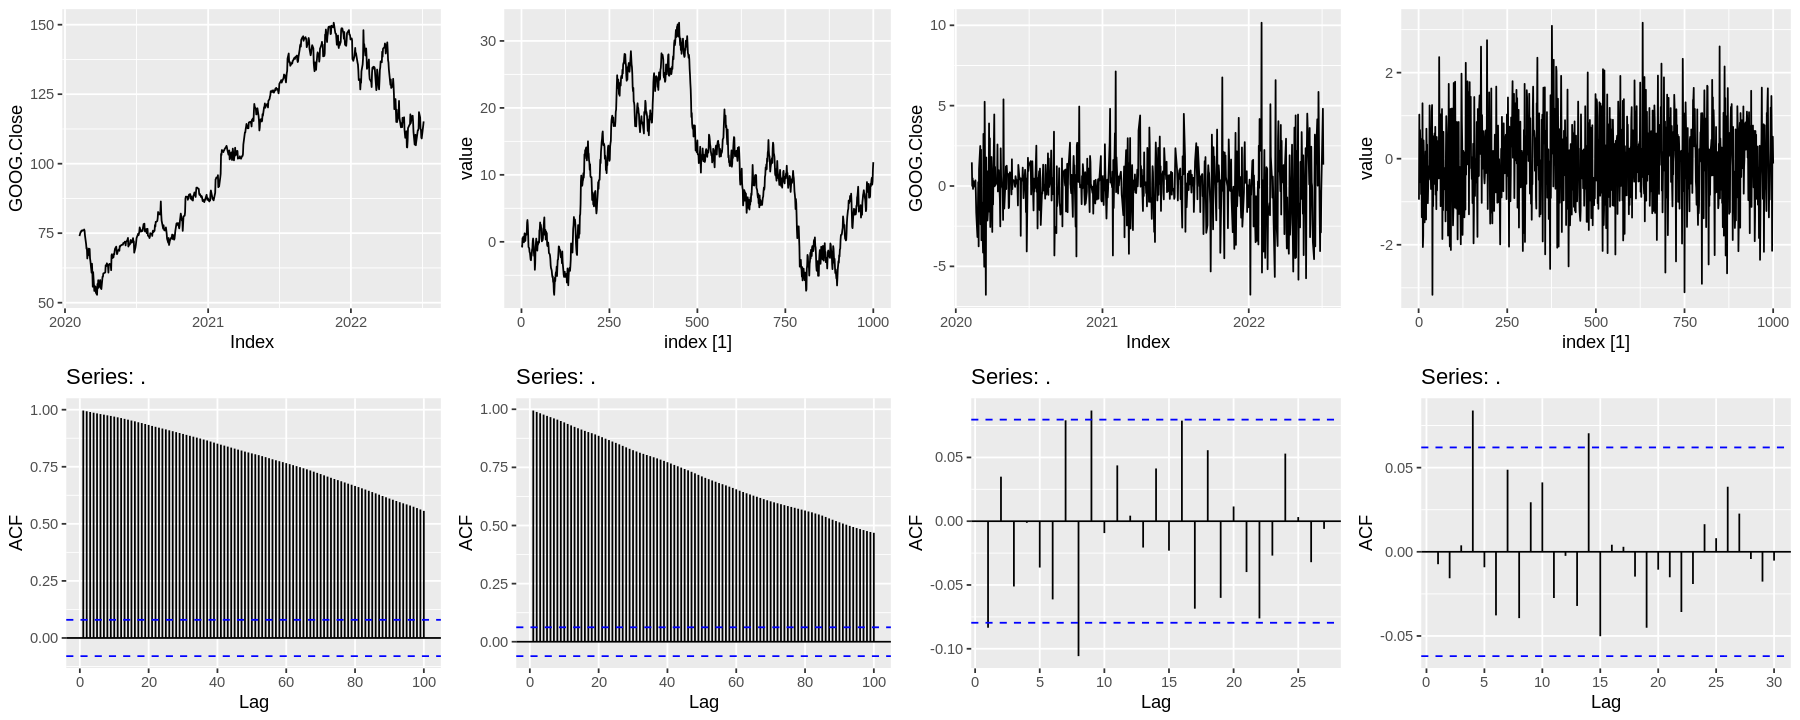

In [80]:
require(quantmod)

randseries <- as_tsibble(ts(rnorm(1000)))
randomwalk <- as_tsibble(ts(cumsum(rnorm(1000))))


getSymbols("GOOG", src = "yahoo", 
           from = "2020-02-07", to = "2022-07-07")
stock <- GOOG[,4]


stock_diff <-diff(stock, na.pad = 0)

plt1<-autoplot(stock)
plt2<-autoplot(randomwalk)

plt3<-autoplot(stock_diff)
plt4<-autoplot(randseries)


plt5<-stock%>%acf(100, plot=FALSE)%>%autoplot
plt6<-randomwalk%>%acf(100,plot=FALSE)%>%autoplot
plt7<-stock_diff%>%acf(plot=FALSE)%>%autoplot
plt8<-randseries%>%acf(plot=FALSE)%>%autoplot


grid.arrange(plt1, plt2, plt3, plt4, plt5, plt6, plt7, plt8, ncol=4, nrow=2)

# Time series fueatures and entropy


In [89]:
cat('goog diff entropy:', entropy(stock_diff))
cat('\ngoog diff approx entropy:', approx_entropy(stock_diff))

cat('\nrand entropy:', entropy(ts(rnorm(1000))))
cat('\nrand approx entropy:', approx_entropy(ts(rnorm(1000))))

goog diff entropy: 0.994293
goog diff approx entropy: 1.351187
rand entropy: 0.9979375
rand approx entropy: 1.6641

In [123]:
mylist <-list(bricksq, WWWusage, AirPassengers, USAccDeaths, sunspot.year, ts(rnorm(500)))

tsf <- tsfeatures(mylist)
ts_entropies <- sapply(mylist, entropy)
ts_app_entropies <- sapply(mylist, approx_entropy)

tsf

frequency,nperiods,seasonal_period,trend,spike,linearity,curvature,e_acf1,e_acf10,seasonal_strength,peak,trough,entropy,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,seas_acf1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,1,4,0.991681395,1.227014e-08,9.44005006,-5.948471,-0.12487082,0.30385882,0.8673509,3,1,0.4062842,0.91148452,5.70030660,-0.07859987,1.7923679,-0.31360257,1.8255791,0.8451741
1,0,1,0.985270221,3.014112e-08,4.44570096,1.101027,0.77417927,0.98292710,NA,NA,NA,0.4611257,0.96018011,4.19316717,0.79176355,1.4054711,0.17355472,0.3343374,NA
12,1,12,0.990955037,1.461792e-08,11.04753201,1.092512,0.50917506,0.93036644,0.9406725,7,11,0.2961049,0.94804734,5.67008712,0.30285526,0.4088376,-0.19100587,0.2507803,0.7603950
12,1,12,0.802457010,9.150729e-07,-2.12456158,2.853549,0.25759447,0.34059288,0.9447945,7,2,0.5477944,0.70747095,1.20449959,0.02330895,0.2747615,-0.48404429,0.7492513,0.6285892
1,0,1,0.125334368,2.101792e-05,3.58469374,1.110651,0.79259539,2.21343833,NA,NA,NA,0.7018523,0.81413495,1.83307492,0.52598938,1.4994073,-0.03493716,0.1882907,NA
1,0,1,0.004736372,6.947211e-06,0.02698304,1.236235,-0.05652262,0.03105896,NA,NA,NA,1.0000000,-0.05199664,0.02936578,-0.49642391,0.2927190,-0.66677462,0.5350423,NA


Plot variable not specified, automatically selected `.vars = value`
Plot variable not specified, automatically selected `.vars = value`
Plot variable not specified, automatically selected `.vars = value`
Plot variable not specified, automatically selected `.vars = value`
Plot variable not specified, automatically selected `.vars = value`
Plot variable not specified, automatically selected `.vars = value`


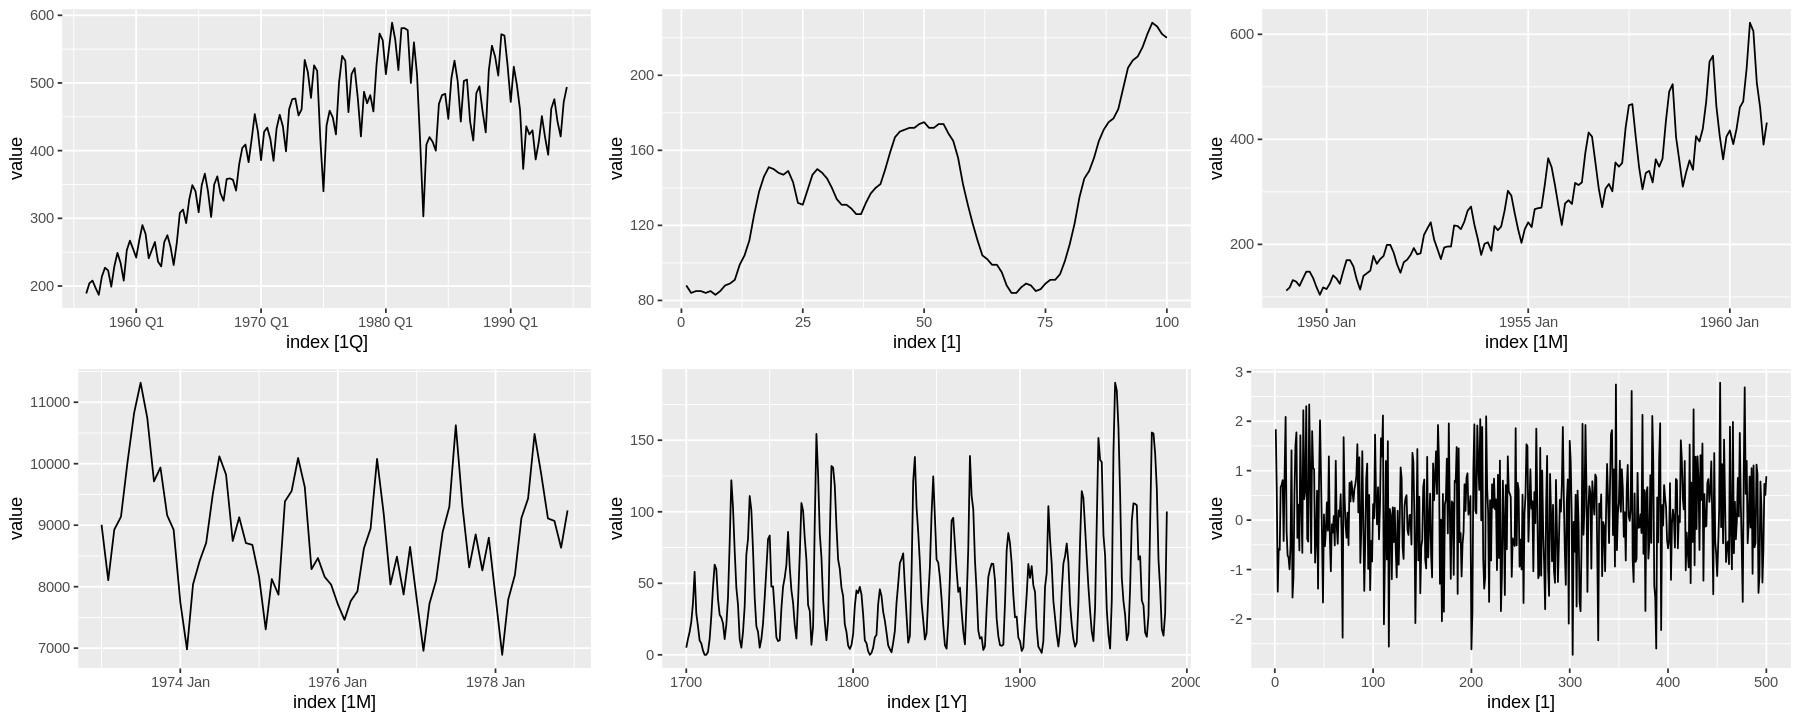

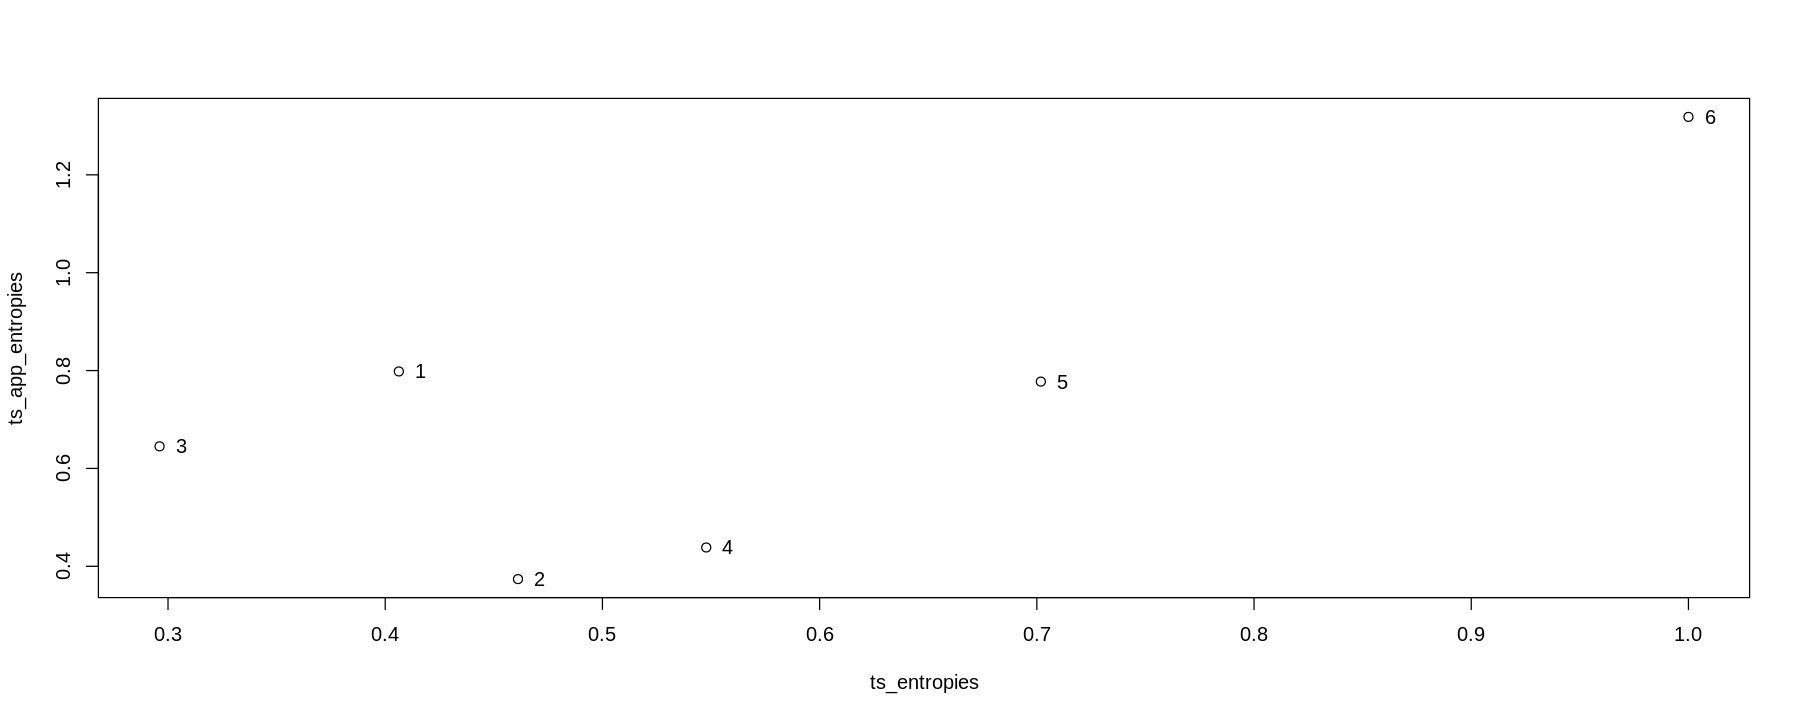

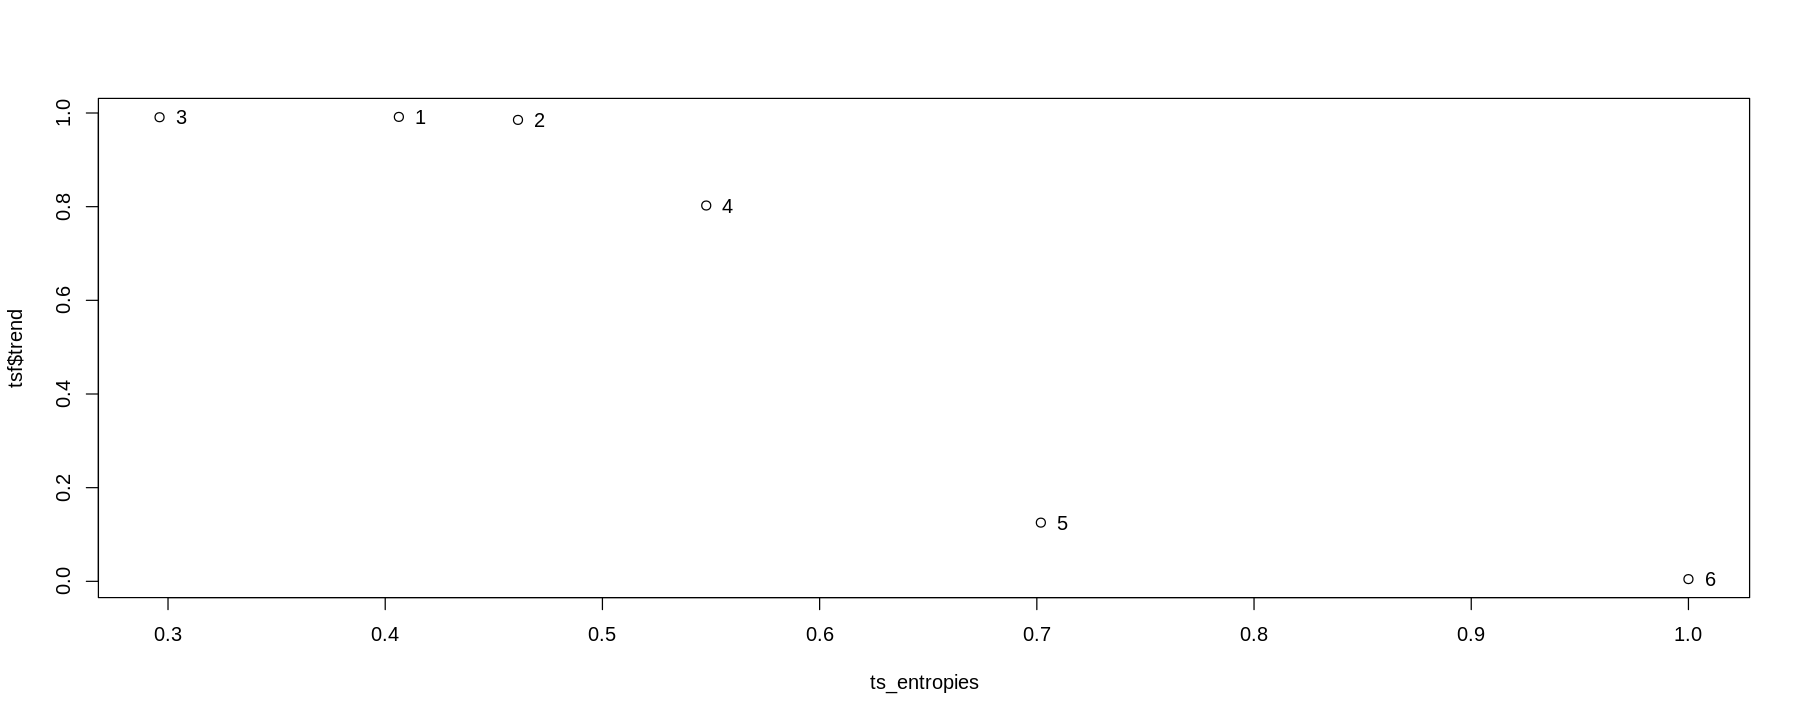

In [135]:
plts <- lapply(mylist, function(x) x%>%as_tsibble%>%autoplot);
grid.arrange(plts[[1]], plts[[2]], plts[[3]],plts[[4]], plts[[5]], plts[[6]], ncol=3, nrow=2)

pl1<- plot(ts_entropies, ts_app_entropies)
text(ts_entropies+0.01, ts_app_entropies, labels=c(1, 2, 3, 4, 5, 6))
pl2<- plot(ts_entropies, tsf$trend)
text(ts_entropies+0.01, tsf$trend, labels=c(1, 2, 3, 4, 5, 6))


# Wavelet decomposition


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



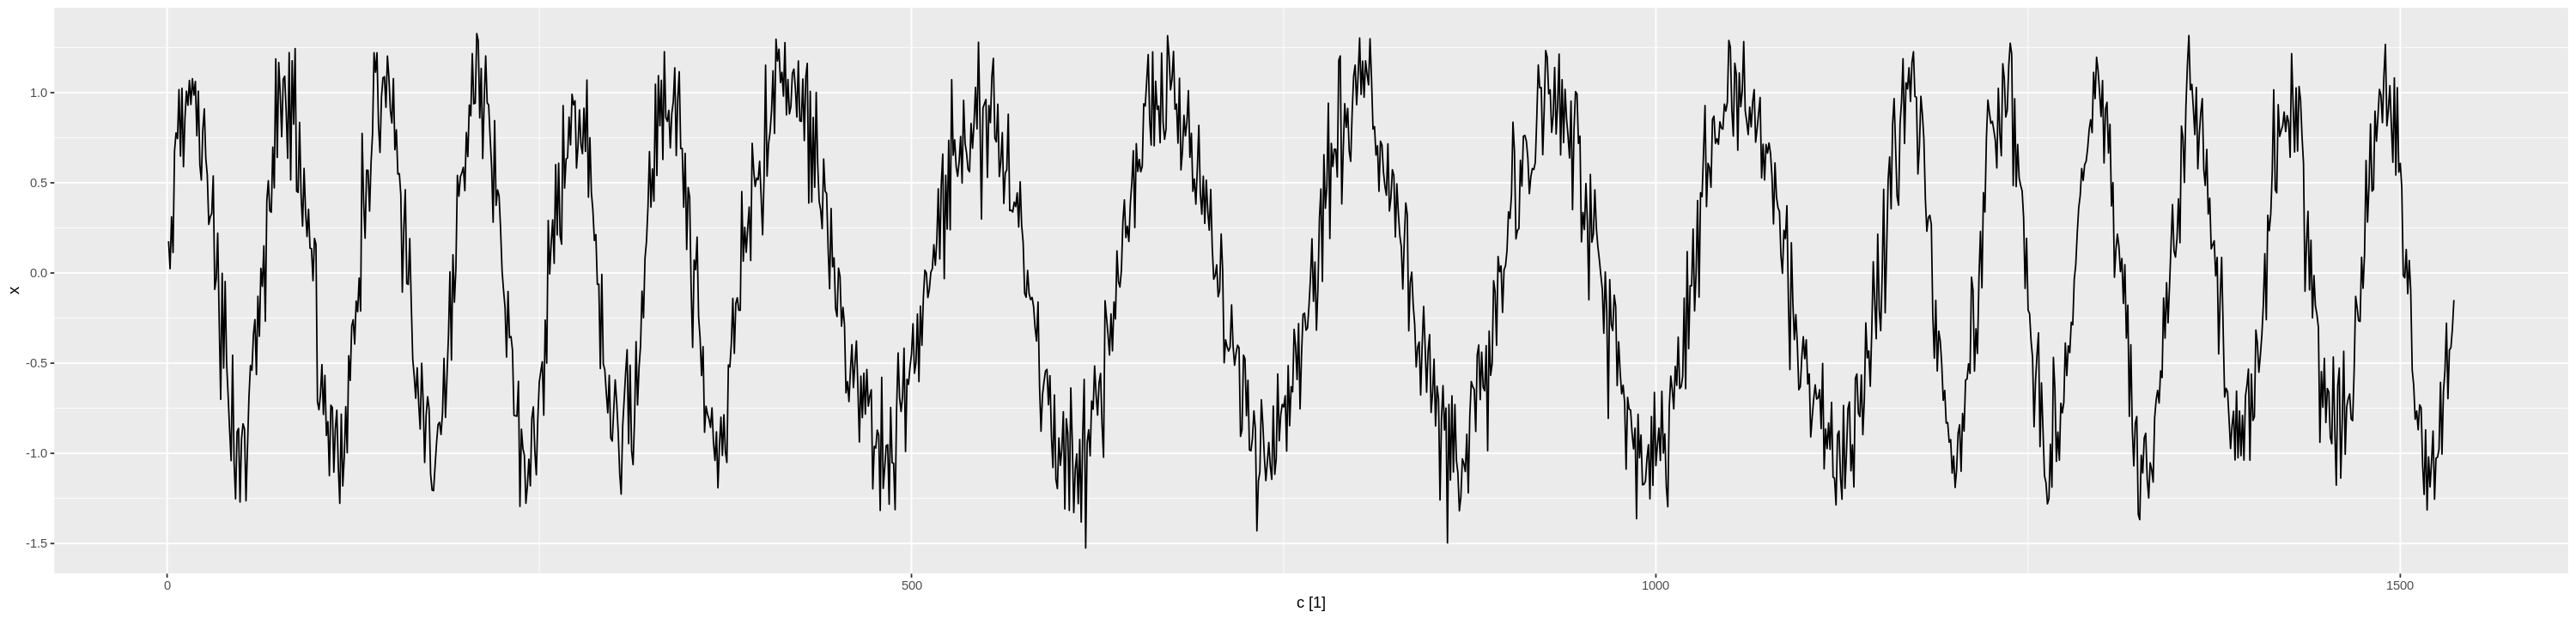

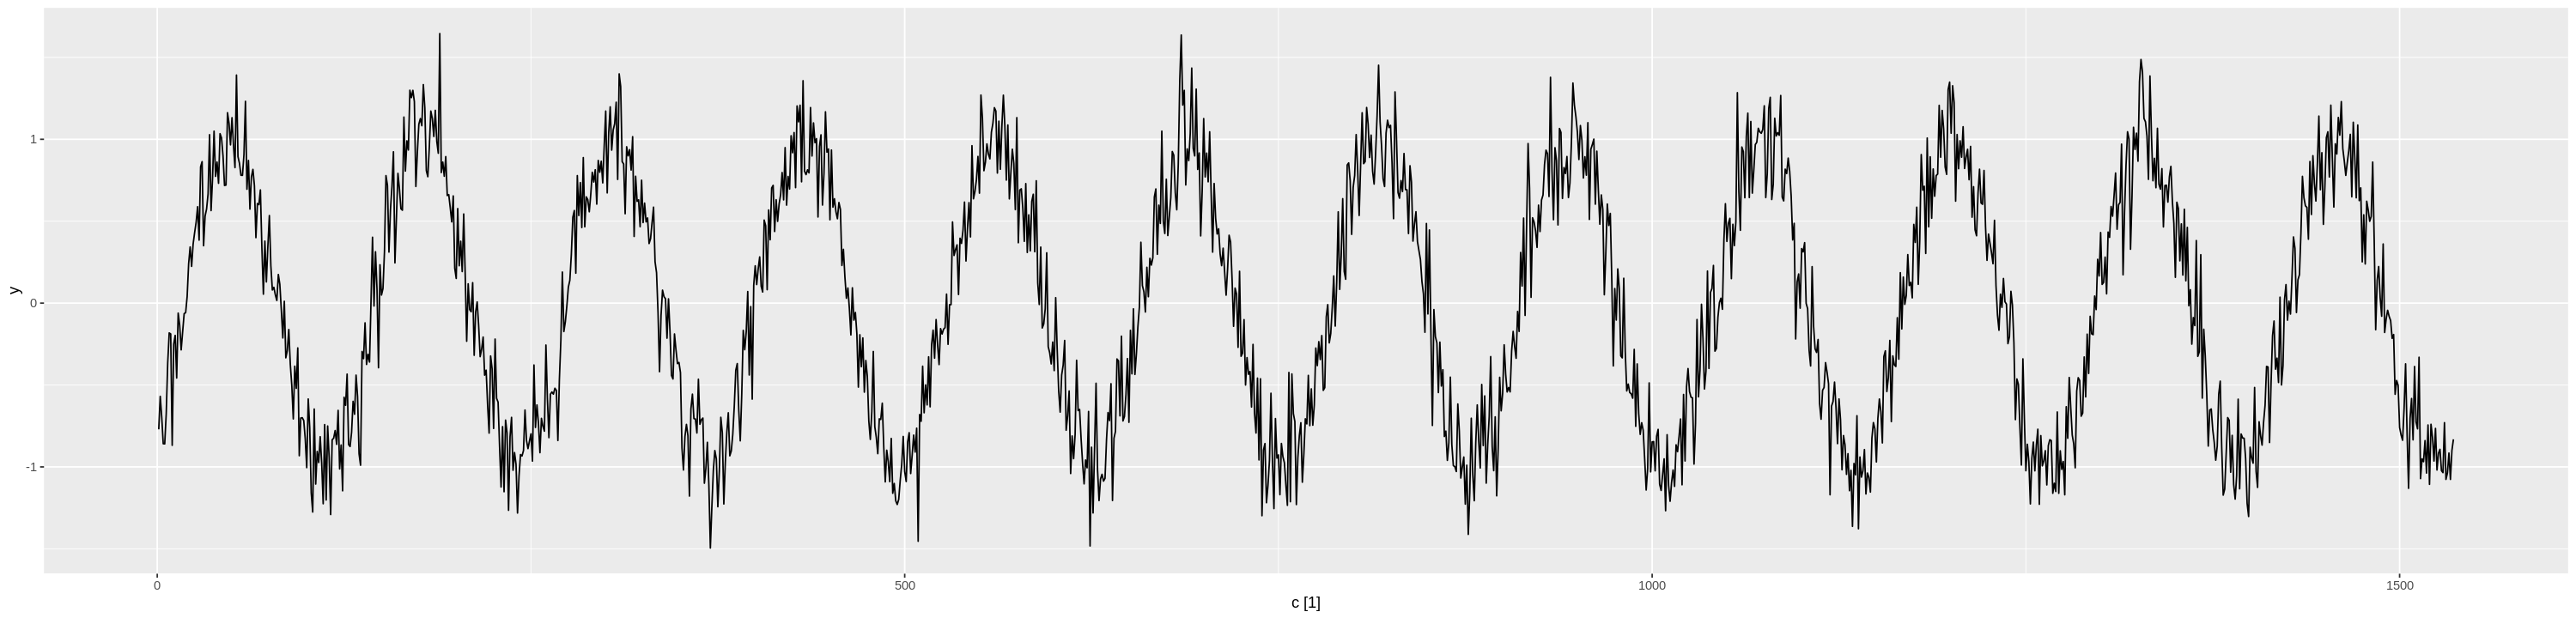

In [ ]:
install.packages("WaveletComp")
library(WaveletComp)
xx <- periodic.series(start.period = 64, length = 128*3)
xy <- periodic.series(start.period = 128, length = 2*128*3)
x <- c(xx,xy,xx) + 0.2*rnorm(4*128*3)
y <- periodic.series(start.period = 128, phase = -16, length = 4*128*3) +
0.2*rnorm(4*128*3)

my.data <- data.frame(x = x, y = y)
my.data$c = 1:(4*128*3)
tsibble_data <- my.data %>% as_tsibble(index=c)
tsibble_data %>% autoplot(x)
tsibble_data %>% autoplot(y)


In [ ]:
my.wc <- analyze.coherency(my.data, my.pair = c("x","y"),
loess.span = 0,
dt = 1, dj = 1/100,
make.pval = TRUE, n.sim = 10)

Starting wavelet transformation and coherency computation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave.xy Angle sWave.xy sAngle Power.xy Power.xy.avg Power.xy.pval Power.xy.avg.pval Coherency Coherence Coherence.avg Coherence.pval Coherence.avg.pval Wave.x Wave.y Phase.x Phase.y Ampl.x Ampl.y Power.x Power.y Power.x.avg Power.y.avg Power.x.pval Power.y.pval Power.x.avg.pval Power.y.avg.pval sPower.x sPower.y Ridge.xy Ridge.co Ridge.x Ridge.y Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 


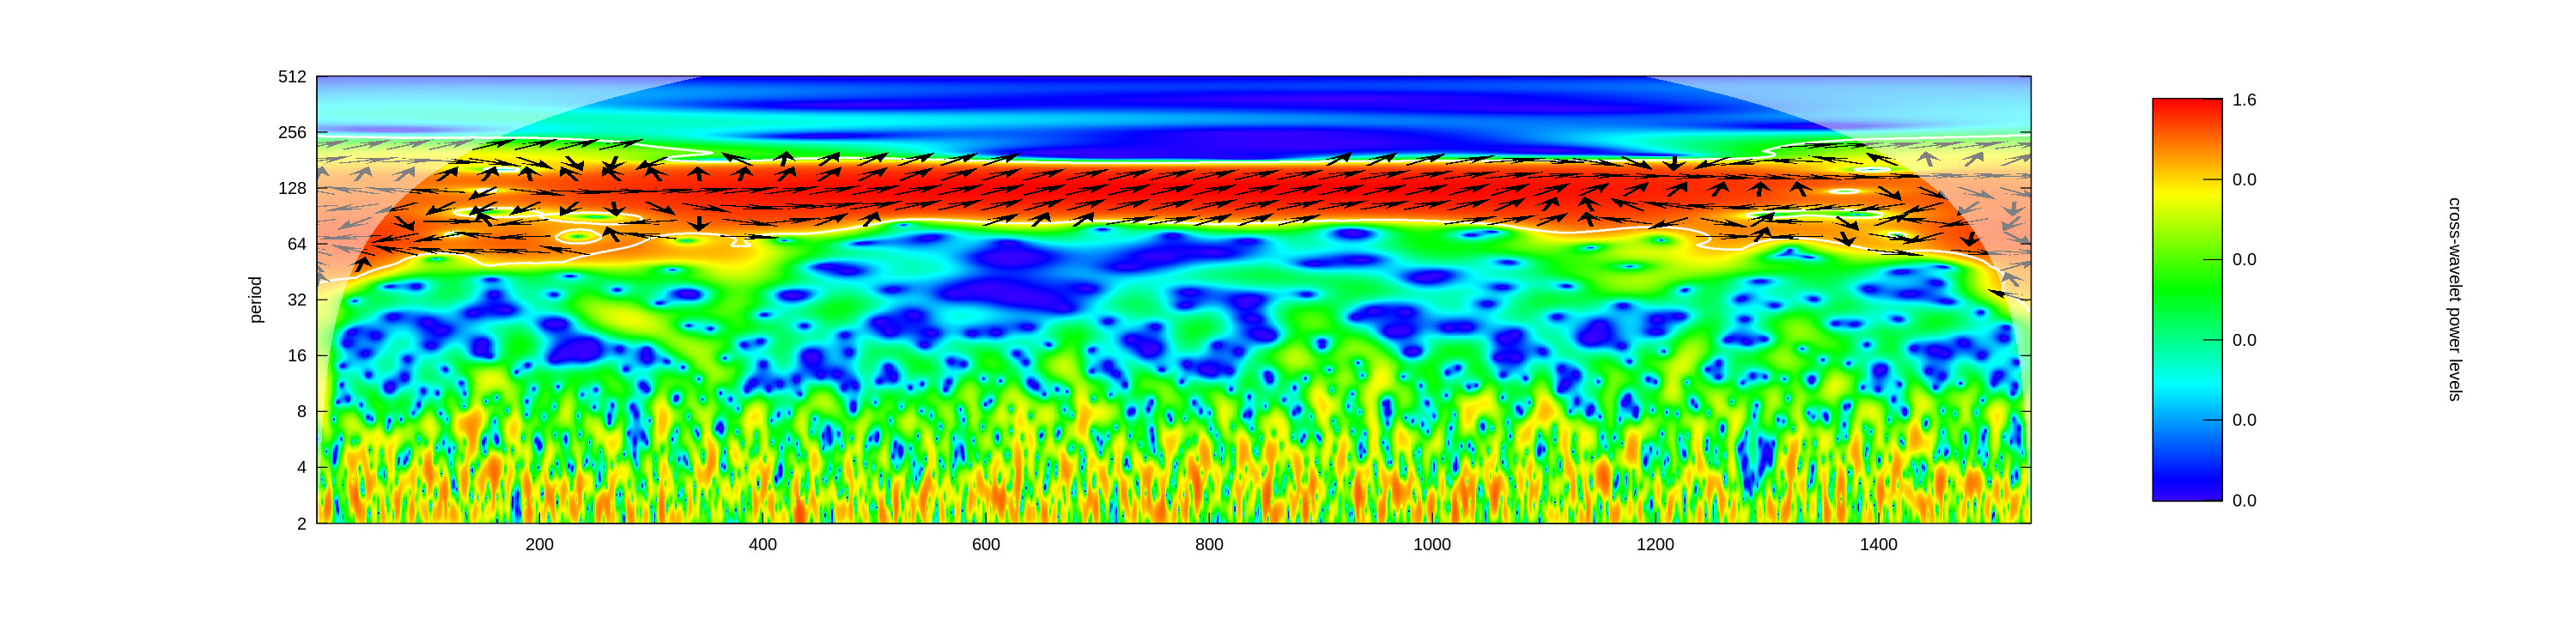

In [ ]:
wc.image(my.wc, n.levels = 250,
siglvl.contour = 0.1, siglvl.arrow = 0.05, ## default values
legend.params = list(lab = "cross-wavelet power levels"),
timelab = "")


Plot variable not specified, automatically selected `.vars = value`
Plot variable not specified, automatically selected `.vars = value`
Plot variable not specified, automatically selected `.vars = value`


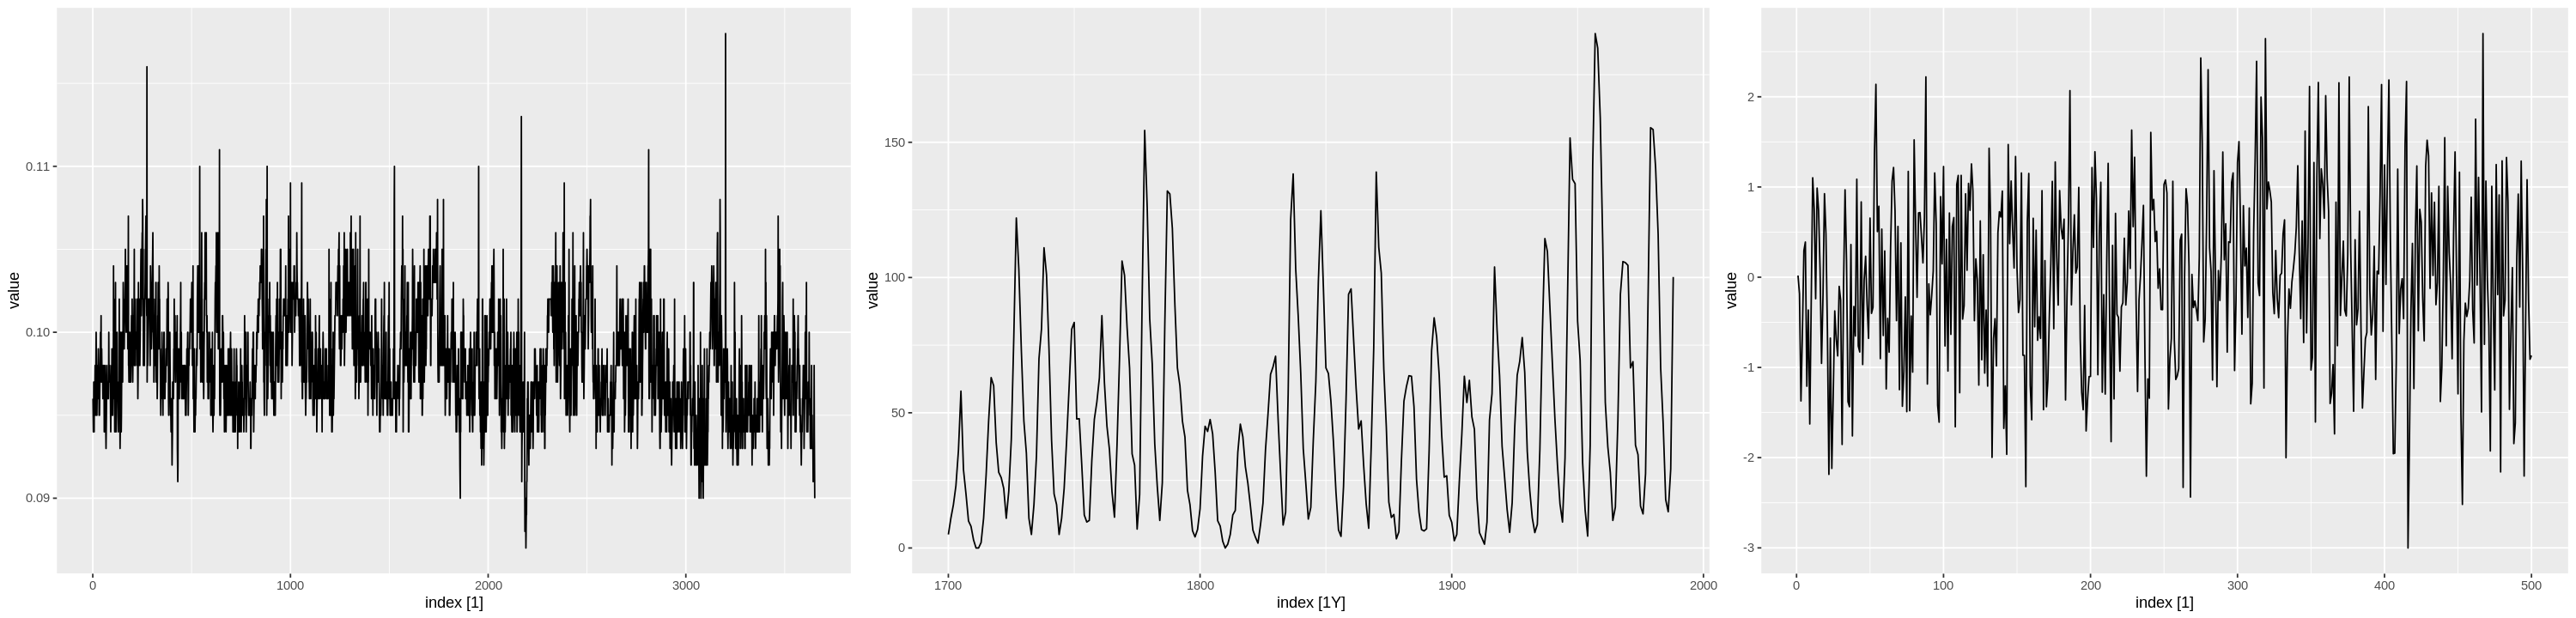

In [ ]:
plt1 <- ts(weather.radiation.Mannheim$temperature) %>% as_tsibble %>% autoplot()
plt1 <- ts(weather.radiation.Mannheim$humidity) %>% as_tsibble %>% autoplot()
plt1 <- ts(weather.radiation.Mannheim$radiation) %>% as_tsibble %>% autoplot()
grid.arrange(plt1, plt2, plt3, ncol=3)

In [ ]:
my.wc <- analyze.coherency(weather.radiation.Mannheim,
my.pair = c("temperature", "humidity"),
loess.span = 0,
dt = 1, dj = 1/50,
lowerPeriod = 32, upperPeriod = 1024,
make.pval = TRUE, n.sim = 10)
max.power <- max(my.wc$Power.xy) # for plotting
save(my.wc, file = "cross_wavelet_transform_temperature_over_humidity")

Starting wavelet transformation and coherency computation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave.xy Angle sWave.xy sAngle Power.xy Power.xy.avg Power.xy.pval Power.xy.avg.pval Coherency Coherence Coherence.avg Coherence.pval Coherence.avg.pval Wave.x Wave.y Phase.x Phase.y Ampl.x Ampl.y Power.x Power.y Power.x.avg Power.y.avg Power.x.pval Power.y.pval Power.x.avg.pval Power.y.avg.pval sPower.x sPower.y Ridge.xy Ridge.co Ridge.x Ridge.y Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 


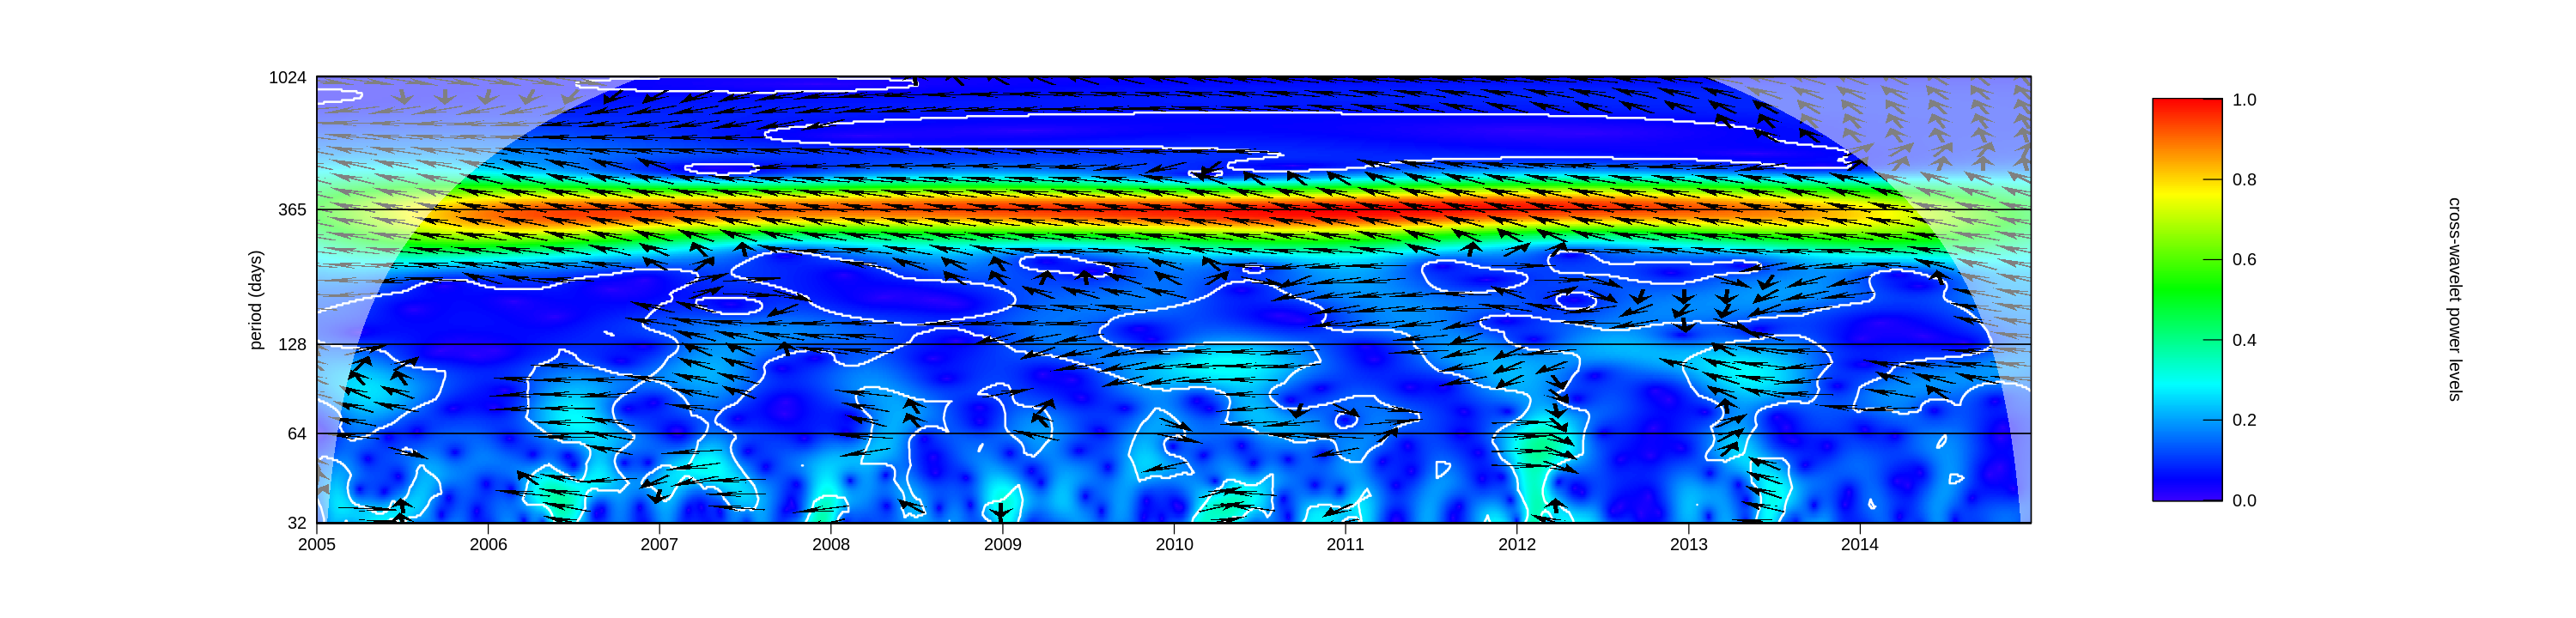

In [ ]:
load("cross_wavelet_transform_temperature_over_humidity")
exponent <- 0.5
wc.image(my.wc, n.levels = 250,
legend.params = list(lab = "cross-wavelet power levels"),
color.key = "interval",
maximum.level = (1.001*max.power)^exponent, exponent = exponent,
# time axis:
label.time.axis = TRUE, show.date = TRUE,
spec.time.axis = list(at = paste(2005:2014, "-01-01", sep = ""),
labels = 2005:2014),
timetcl = -0.5, # outward ticks
# period axis:
periodlab = "period (days)",
spec.period.axis = list(at = c(32, 64, 128, 365, 1024)),
periodtck = 1, periodtcl = NULL)